#**Importing the Libraries**

In [ ]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score





#**Data Collection**

In [ ]:
stock_price = pd.read_csv('/content/AAPL.csv')


#**Data Processing**

In [ ]:
stock_price.rename(columns={
    'Open':'Opening Price',
    'Close':'Closing Price',
    'Volume':'Trading Volume',
}, inplace=True)


In [ ]:
stock_price.columns



Index(['Date', 'Opening Price', 'High', 'Low', 'Closing Price', 'Adj Close',
       'Trading Volume'],
      dtype='object')

In [ ]:
stock_price.head()

,Date,Opening Price,High,Low,Closing Price,Adj Close,Trading Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.407747,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.386473,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.358108,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366972,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.377609,18362400.0


In [ ]:
stock_price.tail()

,Date,Opening Price,High,Low,Closing Price,Adj Close,Trading Volume
9818,2019-11-19,267.899994,268.000000,265.390015,266.290009,266.290009,19041800.0
9819,2019-11-20,265.540009,266.079987,260.399994,263.190002,263.190002,26558600.0
9820,2019-11-21,263.690002,264.010010,261.179993,262.010010,262.010010,30348800.0
9821,2019-11-22,262.589996,263.179993,260.839996,261.779999,261.779999,16331300.0
9822,2019-11-25,262.709991,266.440002,262.519989,266.369995,266.369995,21005100.0


In [ ]:
# number of rows and columns
stock_price.shape

(9823, 7)

In [ ]:
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9823 entries, 0 to 9822
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            9823 non-null   object 
 1   Opening Price   9822 non-null   float64
 2   High            9822 non-null   float64
 3   Low             9822 non-null   float64
 4   Closing Price   9822 non-null   float64
 5   Adj Close       9822 non-null   float64
 6   Trading Volume  9822 non-null   float64
dtypes: float64(6), object(1)
memory usage: 537.3+ KB


#**Data Cleaning**

In [ ]:
stock_price['Date'] = pd.to_datetime(stock_price['Date'])


In [ ]:
# check the number of missing values in each column
stock_price.isnull().sum()

,0
Date,0
Opening Price,1
High,1
Low,1
Closing Price,1
Adj Close,1
Trading Volume,1


Handling the Missing Values

In [ ]:
#delete the missing rows
stock_price.dropna(inplace=True)

In [ ]:
#check the number of missing values in each column
stock_price.isnull().sum()

,0
Date,0
Opening Price,0
High,0
Low,0
Closing Price,0
Adj Close,0
Trading Volume,0


#**Data Analysis / Exploratory Data Analysis**

In [ ]:
stock_price.describe()


,Date,Opening Price,High,Low,Closing Price,Adj Close,Trading Volume
count,9822,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9.822000e+03
mean,2000-05-28 06:28:48.527794688,30.350057,30.640633,30.048298,30.352940,28.364033,8.620720e+07
min,1980-12-12 00:00:00,0.198661,0.198661,0.196429,0.196429,0.156008,3.472000e+05
25%,1990-08-30 06:00:00,1.062500,1.085357,1.043571,1.066964,0.914089,3.318138e+07
50%,2000-05-18 12:00:00,1.709286,1.742366,1.671429,1.712857,1.452872,5.798940e+07
75%,2010-02-24 18:00:00,30.393928,30.555714,29.865358,30.233214,26.305946,1.076320e+08
max,2019-11-25 00:00:00,267.899994,268.000000,265.390015,267.100006,267.100006,1.855410e+09
std,NaN,53.443016,53.908364,52.983661,53.464270,51.603590,8.623138e+07


In [ ]:
# Correlation between features
stock_price.corr()

,Date,Opening Price,High,Low,Closing Price,Adj Close,Trading Volume
Date,1.000000,0.746972,0.747202,0.746529,0.746841,0.733082,0.260461
Opening Price,0.746972,1.000000,0.999958,0.999944,0.999903,0.998954,-0.124972
High,0.747202,0.999958,1.000000,0.999932,0.999951,0.999008,-0.123962
Low,0.746529,0.999944,0.999932,1.000000,0.999954,0.999038,-0.126730
Closing Price,0.746841,0.999903,0.999951,0.999954,1.000000,0.999077,-0.125366
Adj Close,0.733082,0.998954,0.999008,0.999038,0.999077,1.000000,-0.135439
Trading Volume,0.260461,-0.124972,-0.123962,-0.126730,-0.125366,-0.135439,1.000000


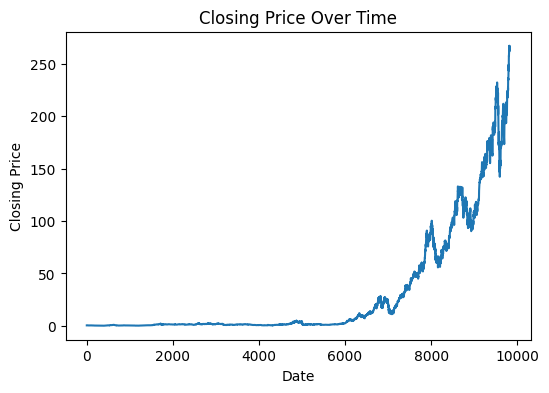

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(stock_price.index, stock_price['Closing Price'])
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


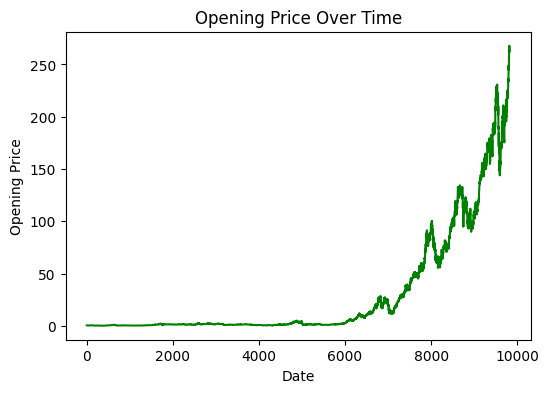

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(stock_price.index, stock_price['Opening Price'], color='green')
plt.title('Opening Price Over Time')
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.show()


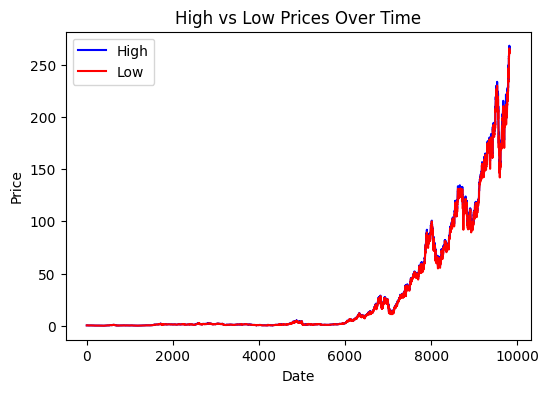

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(stock_price.index, stock_price['High'], label='High', color='blue')
plt.plot(stock_price.index, stock_price['Low'], label='Low', color='red')
plt.title('High vs Low Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


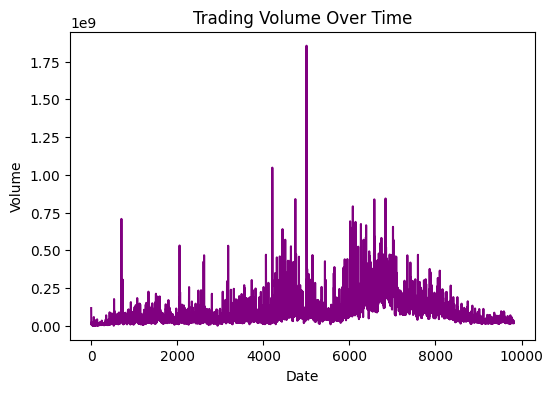

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(stock_price.index, stock_price['Trading Volume'], color='purple')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()


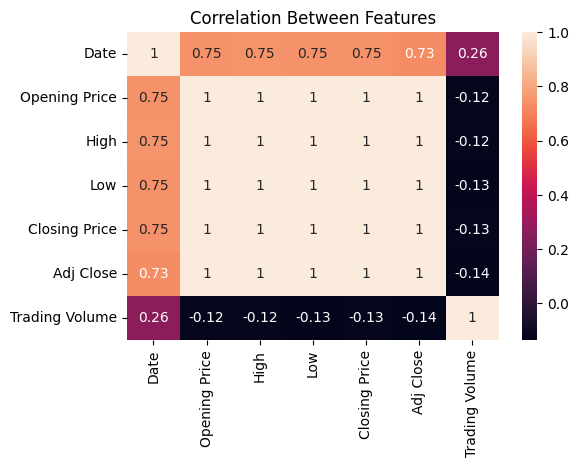

In [ ]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(stock_price.corr(), annot=True, cmap='rocket')
plt.title('Correlation Between Features')
plt.show()


#**Data** **Preprocessing**

##Separating Features & target



In [ ]:

X = stock_price[['Opening Price', 'High', 'Low', 'Trading Volume']]
Y = stock_price['Closing Price']


In [ ]:
print(X)

      Opening Price        High         Low  Trading Volume
0          0.513393    0.515625    0.513393     117258400.0
1          0.488839    0.488839    0.486607      43971200.0
2          0.453125    0.453125    0.450893      26432000.0
3          0.462054    0.464286    0.462054      21610400.0
4          0.475446    0.477679    0.475446      18362400.0
...             ...         ...         ...             ...
9818     267.899994  268.000000  265.390015      19041800.0
9819     265.540009  266.079987  260.399994      26558600.0
9820     263.690002  264.010010  261.179993      30348800.0
9821     262.589996  263.179993  260.839996      16331300.0
9822     262.709991  266.440002  262.519989      21005100.0

[9822 rows x 4 columns]


In [ ]:
print(Y)

0         0.513393
1         0.486607
2         0.450893
3         0.462054
4         0.475446
           ...    
9818    266.290009
9819    263.190002
9820    262.010010
9821    261.779999
9822    266.369995
Name: Closing Price, Length: 9822, dtype: float64


##Splitting the data into Training data & Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)


In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(9822, 4) (7857, 4) (1965, 4)


In [ ]:
print(Y.shape,Y_train.shape,Y_test.shape)

(9822,) (7857,) (1965,)


#**Model Training**

##Linear Regression

In [ ]:
model  = LinearRegression()

In [ ]:
# training the Linear Regression model with training data
model.fit(X_train, Y_train)
print(model)

LinearRegression()


#**Model Evaluation**

##Prediction

In [ ]:
X_train_prediction = model.predict(X_train)
X_test_prediction = model.predict(X_test)

In [ ]:
mse_train = mean_squared_error(Y_train, X_train_prediction)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(Y_train, X_train_prediction)

mse_test = mean_squared_error(Y_test,X_test_prediction)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(Y_test, X_test_prediction)

print("Training RMSE:", rmse_train, "Training R²:", r2_train)
print("Testing RMSE:", rmse_test, "Testing R²:", r2_test)

Training RMSE: 0.33892216809792236 Training R²: 0.9999596298313009
Testing RMSE: 0.3472478900830589 Testing R²: 0.9999585438476267


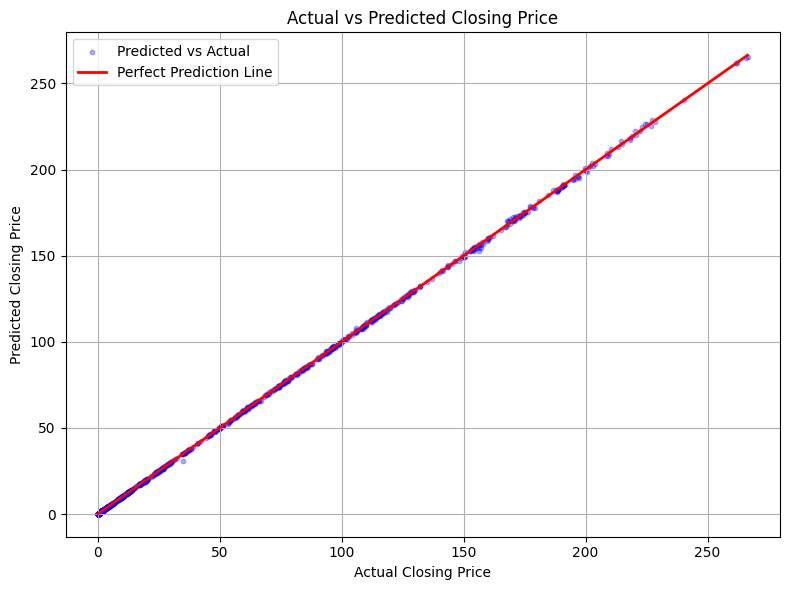

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(Y_test, X_test_prediction, alpha=0.3, s=10, color='blue', label='Predicted vs Actual')
plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()],
         color='red', lw=2, label='Perfect Prediction Line')
plt.xlabel("Actual Closing Price")
plt.ylabel("Predicted Closing Price")
plt.title("Actual vs Predicted Closing Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


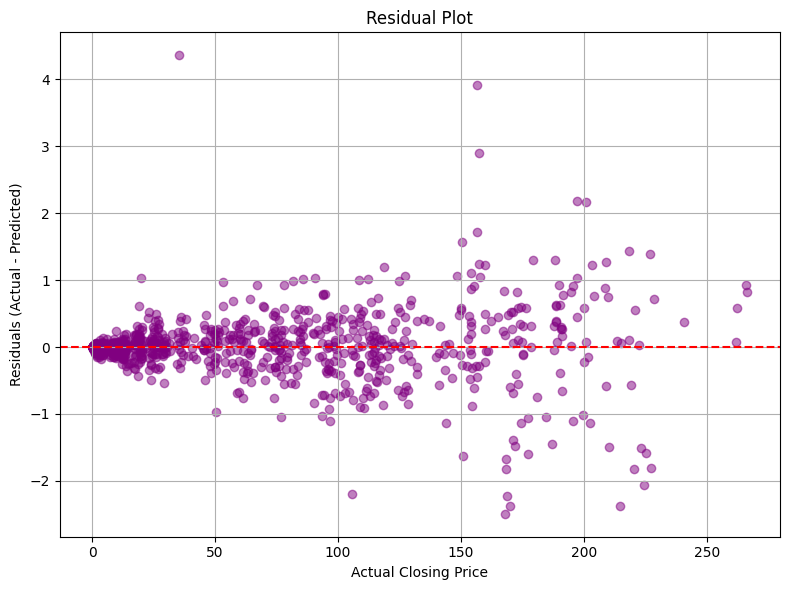

In [ ]:
residuals = Y_test - X_test_prediction

plt.figure(figsize=(8,6))
plt.scatter(Y_test, residuals, alpha=0.5, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Closing Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.tight_layout()
plt.show()


**Conclusion:**

The residuals are randomly scattered around zero, indicating that the model does not show major bias and performs well in predicting the closing prices. The RMSE and R² values for training and testing data also show that the model fits the data accurately.

#**Future Prediction**

We used the trained Linear Regression model to predict closing prices for unseen (future) data points.


In [ ]:
last_row_features = X.iloc[-1].values.reshape(1, -1)
X_future = np.repeat(last_row_features, 30, axis=0)
future_predictions = model.predict(X_future)

print("Predicted Closing Prices for Next 30 Days:\n", future_predictions)


Predicted Closing Prices for Next 30 Days:
 [265.54596355 265.54596355 265.54596355 265.54596355 265.54596355
 265.54596355 265.54596355 265.54596355 265.54596355 265.54596355
 265.54596355 265.54596355 265.54596355 265.54596355 265.54596355
 265.54596355 265.54596355 265.54596355 265.54596355 265.54596355
 265.54596355 265.54596355 265.54596355 265.54596355 265.54596355
 265.54596355 265.54596355 265.54596355 265.54596355 265.54596355]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## **Visualization of Future Predictions**


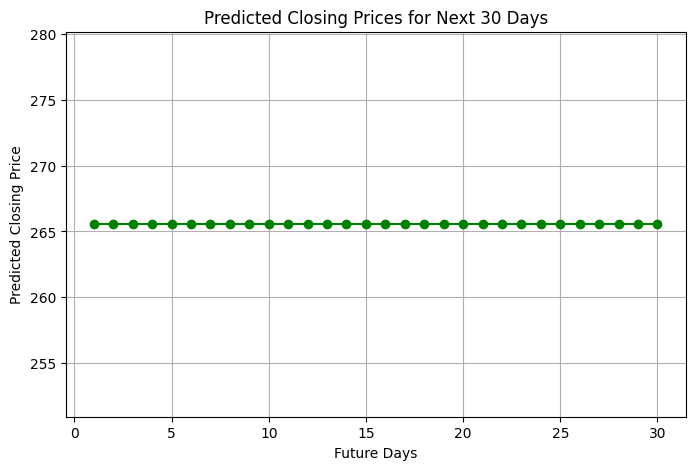

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(future_predictions)+1), future_predictions, marker='o', color='green')
plt.title("Predicted Closing Prices for Next 30 Days")
plt.xlabel("Future Days")
plt.ylabel("Predicted Closing Price")
plt.grid(True)
plt.show()
